In [1]:
import numpy as np
rand = np.random.RandomState(42)
t = 100 * rand.rand(100)
y = np.sin(2 * np.pi * t) + 0.1 * rand.randn(100)

In [2]:
from astropy.stats import LombScargle

In [3]:
frequency, power = LombScargle(t, y).autopower()
import matplotlib.pyplot as plt  
plt.plot(frequency, power) 

In [4]:
plt.plot(frequency, power) 

In [5]:
%matplotlib inline

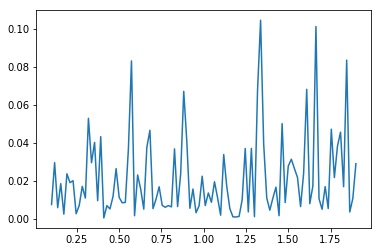

In [6]:
dy = 0.1 * (1 + rand.rand(100))
y = np.sin(2 * np.pi * t) + dy * rand.randn(100)
frequency, power = LombScargle(t, y, dy).autopower()

frequency = np.linspace(0.1, 1.9, 100)
power = LombScargle(t, y, dy).power(frequency)
plt.plot(frequency, power) 

In [15]:
best_frequency = frequency[np.argmax(power)]
t_fit = np.linspace(0, 1)
y_fit = LombScargle(t, y, dy).model(t_fit, best_frequency)
print("best frequency")
print(best_frequency)

IndexError: index 57568 is out of bounds for axis 0 with size 100

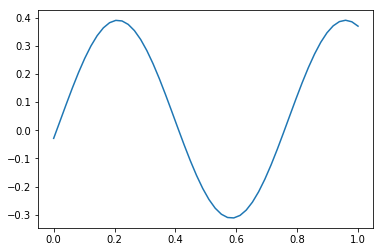

In [8]:
plt.plot(t_fit, y_fit)

In [16]:
import numpy as np
from astropy.stats import LombScargle
import csv
import scipy.io as sio
import matplotlib.pyplot as plt  

mat_contents = sio.loadmat('/home/aldo/Documents/Projects/Avtivemeter/Data/code_cruze_paper/Re actimetry/data_acti_4days.mat')

t = mat_contents['tt_4']
y = mat_contents['yy_4']

t = t.flatten()
y = y.flatten()
dy = 0.1

ls = LombScargle(t, y, dy)
freq, power = ls.autopower()
print(power.max()) 
print(ls.false_alarm_probability(power.max()))



0.122757671941
nan


/home/aldo/anaconda2/envs/Periodogram/lib/python3.5/site-packages/astropy/stats/lombscargle/_statistics.py:246: RuntimeWarning: invalid value encountered in sqrt
  Teff = np.sqrt(4 * np.pi * Dt)  # Effective baseline


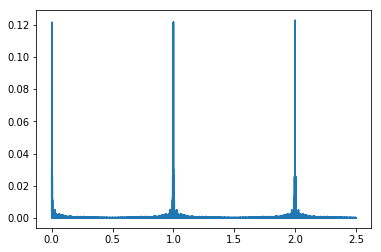

In [10]:
plt.plot(freq, power)

In [ ]:
best_frequency = freq[np.argmax(power)]
print(best_frequency)
print(freq)
print((1/freq[0]))
print((1/60)*(1/freq[0]))

print(freq)
print((1/freq[49]))
print((1/60)*(1/freq[49]))


In [ ]:
t_fit = np.linspace(0, 5759)
y_fit = LombScargle(t, y, dy).model(t_fit,  best_frequency)
plt.plot(t_fit, y_fit)

In [ ]:
len(y_fit)

In [ ]:
inds = numpy.where((freq > 0.9) and (freq < 1.2))

In [14]:
import numpy as np
sio.savemat('/home/aldo/Documents/Projects/Avtivemeter/Data/code_cruze_paper/Re actimetry/freq.mat', {'freq':freq})
sio.savemat('/home/aldo/Documents/Projects/Avtivemeter/Data/code_cruze_paper/Re actimetry/power.mat', {'power':power})

In [18]:
best_frequency = freq[np.argmax(power)]
print("best frequency")
print(best_frequency)

best frequency
1.99925334259


In [19]:
1/best_frequency

0.5001867340646361

In [20]:
t_freq = 1/freq
print(t_freq[21])

1339.30232558


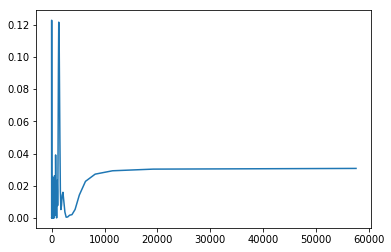

In [21]:
plt.plot(t_freq, power)

In [23]:
dy = 0.1
ls  = LombScargle(t,y,dy)

In [43]:
indx = (t_freq > 1000).nonzero()
print(indx)
print(power[indx])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),)
[ 0.03074096  0.03030061  0.02927569  0.02718089  0.02271362  0.01422595
  0.00523523  0.00203228  0.00167405  0.00059131  0.00044114  0.00363079
  0.01032918  0.01590968  0.01394629  0.00764018  0.00517956  0.01671007
  0.04895224  0.08855857  0.11710854  0.12156914  0.09317713  0.04862272
  0.01642984  0.00766594  0.01586478  0.02331834  0.01794906]


In [37]:
t_freq.compress((t_freq > 1000).flat)

array([ 57590.        ,  19196.66666667,  11518.        ,   8227.14285714,
         6398.88888889,   5235.45454545,   4430.        ,   3839.33333333,
         3387.64705882,   3031.05263158,   2742.38095238,   2503.91304348,
         2303.6       ,   2132.96296296,   1985.86206897,   1857.74193548,
         1745.15151515,   1645.42857143,   1556.48648649,   1476.66666667,
         1404.63414634,   1339.30232558,   1279.77777778,   1225.31914894,
         1175.30612245,   1129.21568627,   1086.60377358,   1047.09090909,
         1010.35087719])

In [48]:
#import scipy
from scipy.signal import find_peaks
x = t_freq[(t_freq>1000).nonzero()]
print(x)

[ 57590.          19196.66666667  11518.           8227.14285714
   6398.88888889   5235.45454545   4430.           3839.33333333
   3387.64705882   3031.05263158   2742.38095238   2503.91304348   2303.6
   2132.96296296   1985.86206897   1857.74193548   1745.15151515
   1645.42857143   1556.48648649   1476.66666667   1404.63414634
   1339.30232558   1279.77777778   1225.31914894   1175.30612245
   1129.21568627   1086.60377358   1047.09090909   1010.35087719]


In [84]:
yy = find_peaks(power[indx])
type(indx)
print(yy[0])
print(t_freq[yy[0]])



[13 21 27]
[ 2132.96296296  1339.30232558  1047.09090909]


In [24]:
ls.false_alarm_probability(0.1216)

/home/aldo/anaconda2/envs/Periodogram/lib/python3.5/site-packages/astropy/stats/lombscargle/_statistics.py:246: RuntimeWarning: invalid value encountered in sqrt
  Teff = np.sqrt(4 * np.pi * Dt)  # Effective baseline


nan

In [25]:
power_circ = 0.1216
ls.false_alarm_probability(power_circ, method='bootstrap')


0.0

In [26]:
ls.false_alarm_probability(power_circ, method='davies')

/home/aldo/anaconda2/envs/Periodogram/lib/python3.5/site-packages/astropy/stats/lombscargle/_statistics.py:246: RuntimeWarning: invalid value encountered in sqrt
  Teff = np.sqrt(4 * np.pi * Dt)  # Effective baseline


nan

In [27]:
ls.false_alarm_probability(power_circ, method='naive')  

1.1932435148134698e-158